# Analyzing the Pareto method

The goal of this notebook is to prove and analyze the usability and functioning of the Pareto method in a simple academic case: minimizing the coordinates in a fully random points in a square.

Expected:

    - The Pareto points should be around the X and Y axis, as the points in the axis are minimizing the error.

In [18]:
import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from paretoset import paretoset

In [37]:
d = 2
n = 100000
df = pd.DataFrame(np.random.normal(0,1,(n,d)), columns=["f"+str(i+1) for i in range(d)])
df.head()

sense = ["min"] * d

start = time.time()
mask = paretoset(df, sense=sense)
nondominated_points = df[mask]
end = time.time()

print(f"time elapsed: {end-start} seconds")

time elapsed: 0.03618359565734863 seconds


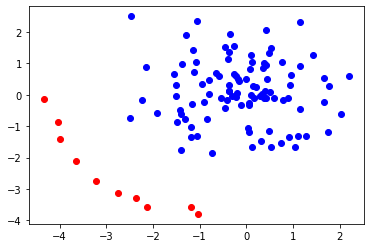

In [38]:
import matplotlib.pyplot as plt

# Pareto solutions
lx, ly = [], []
for coords in nondominated_points.values:
    lx.append(coords[0])
    ly.append(coords[1])
    
plt.scatter(lx, ly, color="red")

# All the points
lx2, ly2 = [], []
for coords in df.values[:100]:
    lx2.append(coords[0])
    ly2.append(coords[1])
plt.scatter(lx2, ly2, color="blue")



In [43]:
print(nondominated_points)

[[3.3131414137743675e-06, 0.10076695485234477], [1.6071355949831556e-05, 0.00012549623094570972], [0.037545081156661664, 1.1283042865573023e-06], [4.930249788315244e-06, 0.07475120564798576], [0.1763002447717329, 1.6365272903495764e-07], [1.8191352210150669e-06, 0.7802158206616966], [0.008198688569784007, 3.487860287032518e-06]]


# Option 2: Using pygmo

ndf, dl, dc, ndr = pg.fast_non_dominated_sorting(points = 2d-array-like-object)

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import random
import time
import pygmo as pg

In [12]:
ti = time.time()
array = np.asarray([[random.random() , random.random()] for _ in range(20000)])
nondomination_points, domination_points, dc, ndr = pg.fast_non_dominated_sorting(points=array)
print("Aproximation done in: ", (time.time()-ti), 'seconds\nRecords processed: ', len(array))

Aproximation done in:  3.806204319000244 seconds
Records processed:  20000
